In [339]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
# from mpl_toolkits.mplot3d import proj3d
import math
import random
from ipywidgets import Layout

In [340]:

def plot_the_result(points, line_parameters, title):
  figure = plt.figure()
  ax = figure.add_subplot()
  ax.set_xlim([-1,21])
  ax.set_ylim([-15,45])
  ax.set_title(title)
  ax.scatter(points[0,:], points[1,:], cmap='Greens')
  ax.plot([-10, 30], [-10 * line_parameters[0,0] + line_parameters[1,0], 30 * line_parameters[0,0]+ line_parameters[1,0]])

print("Initial configuration successfully done!")

Initial configuration successfully done!


In [341]:
def execute_the_line_function(x):
  return (x * 1.5 - 2)

In [342]:
def generate_random_points_on_a_line(number_of_points):
    generated_points = np.zeros((2, number_of_points))
    for index in range(number_of_points):
        generated_points[0,index] = random.uniform(0, 20)
        generated_points[1,index] = execute_the_line_function(generated_points[0,index])
    return generated_points

In [343]:
some_points_for_test_purpose = generate_random_points_on_a_line(10)
print(some_points_for_test_purpose)

[[ 6.33670889 17.56358168 11.02341821  8.5982829   2.32994186  3.83802886
  11.61290385 19.97630377 10.13600881 19.36678717]
 [ 7.50506334 24.34537252 14.53512732 10.89742436  1.49491278  3.75704329
  15.41935577 27.96445565 13.20401321 27.05018075]]


In [344]:
def get_point_coordinates_formatted(points):
  formatted_string = ''
  for index in range(points.shape[1]):
    formatted_string += f'x,y: {(points[0][index], points[1][index])}\n'
  return formatted_string

print(f'Output for geeks:\n{some_points_for_test_purpose}\n\n')
print(f'Output for human beings:\n{get_point_coordinates_formatted(some_points_for_test_purpose)}')

Output for geeks:
[[ 6.33670889 17.56358168 11.02341821  8.5982829   2.32994186  3.83802886
  11.61290385 19.97630377 10.13600881 19.36678717]
 [ 7.50506334 24.34537252 14.53512732 10.89742436  1.49491278  3.75704329
  15.41935577 27.96445565 13.20401321 27.05018075]]


Output for human beings:
x,y: (6.336708892684415, 7.5050633390266235)
x,y: (17.563581678953845, 24.345372518430768)
x,y: (11.023418214780618, 14.535127322170926)
x,y: (8.598282903951048, 10.897424355926573)
x,y: (2.329941856302775, 1.4949127844541628)
x,y: (3.838028860972129, 3.757043291458194)
x,y: (11.612903849528456, 15.419355774292683)
x,y: (19.97630376750767, 27.964455651261503)
x,y: (10.13600880554138, 13.20401320831207)
x,y: (19.366787167685185, 27.050180751527776)



In [345]:
def add_noise_to_the_points(points, standard_deviation):
    noisy_points = np.copy(points)
    print(noisy_points.shape)
    for i in range(noisy_points.shape[0]):
        for j in range(noisy_points.shape[1]):
            noisy_points[i,j] = noisy_points[i,j] + np.random.normal(0, standard_deviation)
    return noisy_points

points_with_some_noise = add_noise_to_the_points(some_points_for_test_purpose, 1)
print(f'Output for geeks:\n{points_with_some_noise}\n\n')
print(f'Output for human beings:\n{get_point_coordinates_formatted(points_with_some_noise)}')

(2, 10)
Output for geeks:
[[ 7.84902009 18.88767145 12.51733887  9.51034769  0.45346294  2.00467565
  11.85600762 20.47489022  7.87185497 17.8781396 ]
 [ 8.85948034 24.69892243 15.53783665 12.87558747  2.81753918  4.04196456
  15.95011175 28.09033261 12.19730591 28.08447145]]


Output for human beings:
x,y: (7.849020086984018, 8.859480336954896)
x,y: (18.887671445349536, 24.6989224274751)
x,y: (12.51733886592474, 15.537836649244129)
x,y: (9.510347685969716, 12.875587465360958)
x,y: (0.45346294052832015, 2.817539181916833)
x,y: (2.004675645434309, 4.0419645585146435)
x,y: (11.856007618492082, 15.950111753391893)
x,y: (20.474890220815013, 28.090332607454464)
x,y: (7.87185496597005, 12.197305911479901)
x,y: (17.878139598991925, 28.08447144934594)



In [346]:
def add_some_outlier(points, number_of_outliers):
    points_including_outliers = np.copy(points)
    for i in range(number_of_outliers):
        points_including_outliers[1,i] = points_including_outliers[1,i] + random.randint(5,15)

    return points_including_outliers

In [347]:
points_with_some_outliers = add_some_outlier(some_points_for_test_purpose, 3)
print(f'Output for geeks:\n{points_with_some_outliers}\n\n')
print(f'Output for human beings:\n{get_point_coordinates_formatted(points_with_some_outliers)}')

Output for geeks:
[[ 6.33670889 17.56358168 11.02341821  8.5982829   2.32994186  3.83802886
  11.61290385 19.97630377 10.13600881 19.36678717]
 [18.50506334 33.34537252 25.53512732 10.89742436  1.49491278  3.75704329
  15.41935577 27.96445565 13.20401321 27.05018075]]


Output for human beings:
x,y: (6.336708892684415, 18.505063339026623)
x,y: (17.563581678953845, 33.345372518430764)
x,y: (11.023418214780618, 25.535127322170926)
x,y: (8.598282903951048, 10.897424355926573)
x,y: (2.329941856302775, 1.4949127844541628)
x,y: (3.838028860972129, 3.757043291458194)
x,y: (11.612903849528456, 15.419355774292683)
x,y: (19.97630376750767, 27.964455651261503)
x,y: (10.13600880554138, 13.20401320831207)
x,y: (19.366787167685185, 27.050180751527776)



In [348]:
def is_this_point_an_inlier(point, consensus_threshold, line_function):
    p1=np.array([0, line_function(0)])
    p2=np.array([1, line_function(1)])
    distance = np.linalg.norm(np.cross(p2 - p1, point - p1)) / np.linalg.norm(p2 - p1)
    if distance <= consensus_threshold:
        return True
    else:
        return False

print(is_this_point_an_inlier([18.01614331, 25.02421496], 2, execute_the_line_function))
print(is_this_point_an_inlier([18.01614330564956, 31.02421495847434], 2, execute_the_line_function))

True
False


In [349]:
def fit_a_line_without_ransac(points) -> np.array:
  '''
  This function calculates the line parameters for the given points by using the least squares method.
  
  :return: An np.array with shape (2,1) where the first element is the slope and the second element is the y-intercept.
  
  '''
  
  # Extract the x and y coordinates of the points
  x = points[0,:]
  y = points[1,:]
  
  # Calculate sums
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x_squared = np.sum(x**2)
  sum_xy = np.sum(x*y)
  
  # Calculate the line parameters
  m = (len(x) * sum_xy - sum_x*sum_y) / (len(x) * sum_x_squared - sum_x**2)
  y_intercept = (sum_y - m * sum_x) / len(x)
  
  # print(f'm: {m}')
  # print(f'y_intercept: {y_intercept}')
  
  return np.array([[m], [y_intercept]])


In [350]:

def fit_a_line_with_ransac(points,
                           consensus_threshold,
                           minimum_number_of_consensus_set_size,
                           maximum_number_of_iterations):
  
  best_model = None
  best_inlieres = []
  
  # Iterate for a maximum number of iterations to find the best model
  for i in range(maximum_number_of_iterations):
    
    # Choose two random points
    indices_of_two_samples = np.random.choice(points.shape[1], 2, replace=False)
    print(indices_of_two_samples)
    x1 = points[0, indices_of_two_samples[0]]
    y1 = points[1, indices_of_two_samples[0]]
    x2 = points[0, indices_of_two_samples[1]]
    y2 = points[1, indices_of_two_samples[1]]
    print(x1)
    print(y1)
    print(x2)
    print(y2)
    
    # Calculate the line parameters
    m = (y2 - y1) / (x2 - x1)
    t = y2 - m * x1
    
    # Compute the consensus set
    inliers = []
    for j in range(points.shape[1]):
        x = points[0, j]
        y = points[1, j]
        distance = abs(m * x - y + t) / np.sqrt(m**2 + 1)
        if distance < consensus_threshold:
            inliers.append(j)
            
    print(f"inliers are {inliers}")
            
    if len(inliers) > len(best_inlieres):
        best_inlieres = inliers
        best_model = np.array([[m], [t]])
        
    # Stop if we have found a consensus with a minimum number of inliers
    if len(best_inlieres) > minimum_number_of_consensus_set_size:
        break
    
  return best_model
  
  
  
  

[3 6]
8.598282903951048
10.897424355926573
11.612903849528456
15.419355774292683
inliers are []
[0 7]
6.336708892684415
18.505063339026623
19.97630376750767
27.964455651261503
inliers are [1]
[8 0]
10.13600880554138
13.20401320831207
6.336708892684415
18.505063339026623
inliers are [6]
[5 1]
3.838028860972129
3.757043291458194
17.563581678953845
33.345372518430764
inliers are []
[2 8]
11.023418214780618
25.535127322170926
10.13600880554138
13.20401320831207
inliers are [2, 6, 8]
[3 0]
8.598282903951048
10.897424355926573
6.336708892684415
18.505063339026623
inliers are [8]
[1 5]
17.563581678953845
33.345372518430764
3.838028860972129
3.757043291458194
inliers are []
[5 1]
3.838028860972129
3.757043291458194
17.563581678953845
33.345372518430764
inliers are []
[9 7]
19.366787167685185
27.050180751527776
19.97630376750767
27.964455651261503
inliers are [3, 4, 5, 6, 7, 8, 9]
[0 7]
6.336708892684415
18.505063339026623
19.97630376750767
27.964455651261503
inliers are [1]
[5 8]
3.83802886097

/tmp/ipykernel_40298/223867519.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[0,:], points[1,:], cmap='Greens')


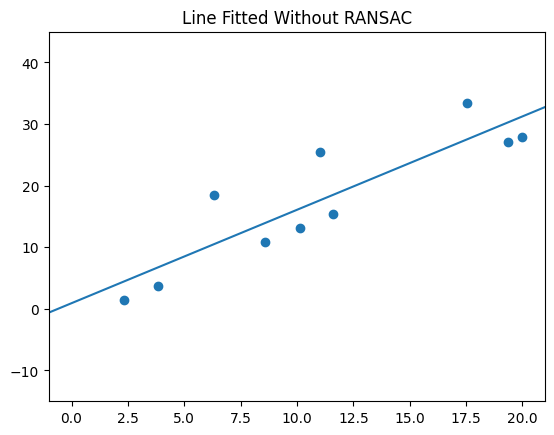

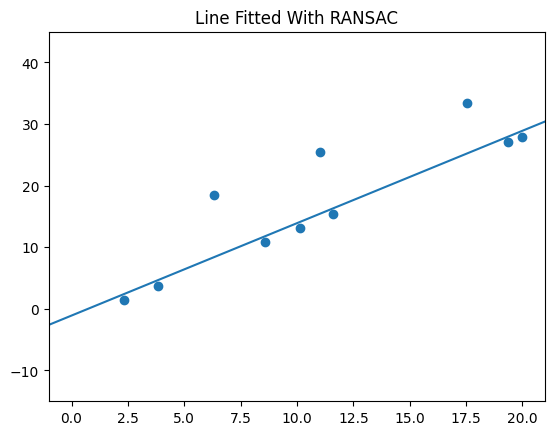

In [351]:
# Without RANSAC
line_parameters = fit_a_line_without_ransac(points_with_some_outliers)
plot_the_result(points_with_some_outliers, line_parameters, "Line Fitted Without RANSAC")

# With RANSAC
line_parameters_RANSAC = fit_a_line_with_ransac(points_with_some_outliers, 2, 8, 200)
plot_the_result(points_with_some_outliers, line_parameters_RANSAC, "Line Fitted With RANSAC")